In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ast import literal_eval
from sklearn.preprocessing import MinMaxScaler

In [153]:
df = pd.read_csv('spotify_df')
df.head()

,tracks,artists,ids,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,feature_vector
0,Norf Norf,Vince Staples,4uQ7wYsuL0DryknoDc11Hk,0.925,0.549,7.0,-6.572,1.0,0.0656,0.39600,0.000154,0.1100,0.0904,100.014,"[0.925, 0.549, 7, -6.572, 1, 0.0656, 0.396, 0...."
1,UN DIA (ONE DAY) (Feat. Tainy),J Balvin,0EhpEsp4L0oRGM0vmeaN5e,0.571,0.693,6.0,-8.234,0.0,0.0545,0.00536,0.000000,0.1730,0.3930,168.169,"[0.571, 0.693, 6, -8.234, 0, 0.0545, 0.00536, ..."
2,Prisoner (feat. Dua Lipa),Miley Cyrus,2Oycxb8QbPkpHTo8ZrmG0B,0.781,0.670,3.0,-3.912,0.0,0.0452,0.01030,0.000000,0.0761,0.5950,127.990,"[0.781, 0.67, 3, -3.912, 0, 0.0452, 0.0103, 0,..."
3,Levitating (feat. DaBaby),Dua Lipa,5nujrmhLynf4yMoMtj8AQF,0.702,0.825,6.0,-3.787,0.0,0.0601,0.00883,0.000000,0.0674,0.9150,102.977,"[0.702, 0.825, 6, -3.787, 0, 0.0601, 0.00883, ..."
4,Selfless,The Strokes,2t0wwvR15fc3K1ey8OiOaN,0.538,0.679,4.0,-4.297,1.0,0.0333,0.19100,0.001750,0.0889,0.0888,121.990,"[0.538, 0.679, 4, -4.297, 1, 0.0333, 0.191, 0...."


In [154]:
df = df.drop(['mode', 'instrumentalness', 'speechiness', 'liveness'], axis=1)
df = df.drop_duplicates('tracks')
df = df.drop(df.index[106:114])

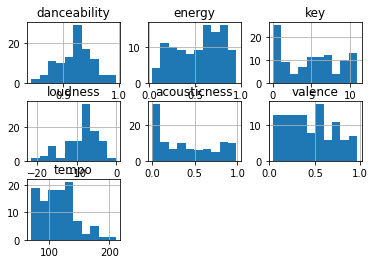

In [157]:
df.hist()
plt.show()

In [47]:
def cos_sim(a, b):
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    
    return dot_product / (norm_a * norm_b)

In [144]:
features = df[['danceability', 'energy', 'key', 'loudness', 'acousticness', 'valence', 'tempo']]

In [142]:
norm = MinMaxScaler().fit(features)
vec_norm = norm.transform(features)

In [161]:
sim_list = []
idx_list = []

for first_vector in range(0, 106):
    for second_vector in range(first_vector, 105):
        sim = cos_sim(train_norm[first_vector], train_norm[second_vector+1])
        sim_list.append(sim)
        idx_list.append((first_vector,second_vector+1))


In [176]:
df2 = pd.DataFrame({'Similarity' : sim_list, 'Indexes': idx_list})

<AxesSubplot:>

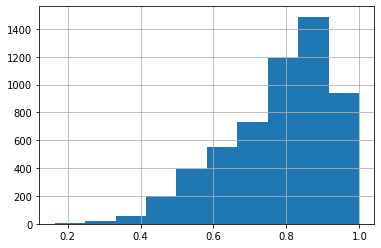

In [179]:
df2.Similarity.hist()

In [184]:
df2[df2.Similarity > 0.999]

,Similarity,Indexes
769,0.999197,"(7, 63)"


In [194]:
df.loc[[7, 63]] #Two tracks with high similarity from two heavy metal bands

,tracks,artists,ids,danceability,energy,key,loudness,acousticness,valence,tempo,feature_vector
7,One,Metallica,5IX4TbIR5mMHGE4wiWwKW0,0.437,0.695,7.0,-9.447,0.001110,0.413,102.178,"[0.437, 0.695, 7, -9.447, 1, 0.0617, 0.00111, ..."
63,Jambi,TOOL,2gbPu2QNqhnnqtfK3yyeZ0,0.475,0.831,9.0,-7.419,0.000145,0.521,110.420,"[0.475, 0.831, 9, -7.419, 0, 0.0505, 0.000145,..."


In [214]:
df2[df2.Similarity < 0.20]

,Similarity,Indexes
4094,0.196504,"(51, 66)"
4622,0.164423,"(62, 66)"


In [216]:
df.loc[[62, 66]] #The tracks with the least similarity are a low-fi study song and a rock song

,tracks,artists,ids,danceability,energy,key,loudness,acousticness,valence,tempo,feature_vector
62,White Unicorn,Wolfmother,3HODMfgPVIrlW9K5O3OW3s,0.351,0.797,0.0,-4.099,0.000589,0.394,106.502,"[0.351, 0.797, 0, -4.099, 1, 0.0345, 0.000589,..."
66,Sleepy,Spencer Hunt,6MRALa6nFdIjr9Z8Njf7sT,0.748,0.119,9.0,-21.550,0.877000,0.038,120.061,"[0.748, 0.119, 9, -21.55, 1, 0.0902, 0.877, 0...."


In [218]:
df.to_csv('spotify_df_mod', index=False)